# Report Generation Example

The following report is generated by loading up the model.

In [1]:
import jinja2
import capellambse
from IPython.display import Markdown

from IPython.core.display import HTML
#from IPython import display
import pandas as pd 

resources = {
    "EV_Thermal_System": "EV_Thermal_System/EV Thermal System",
}
path_to_model = "../EV Thermal System.aird"

model = capellambse.MelodyModel(path_to_model, resources=resources)

from capella_tools import Pub4C
# Instantiate the class with the traceability file
traceability_store = Pub4C.Traceability_Store("../EV Thermal System.traceability")


Ignoring file of unknown type, loaded model may be incomplete: EV Thermal System.traceability


Below defines a set of routines that use Jinga templates to generate html report.


# Component Report

The following generates report of the noted physical component.



**Dynamically Generated Context diagram of:**
Vehicle

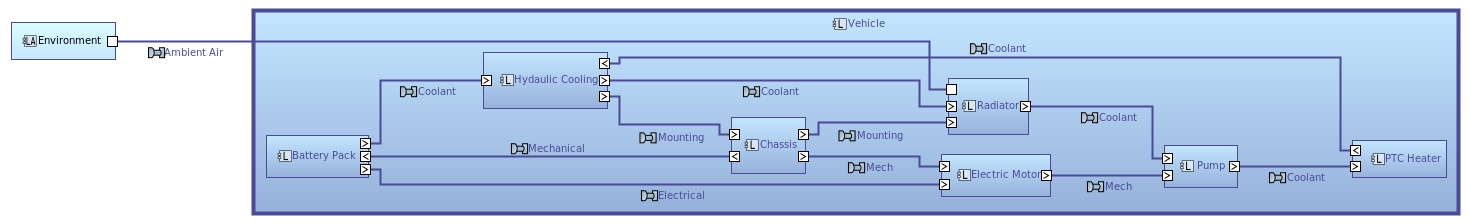

In [2]:
from IPython import display as diag_display
lc = model.search("LogicalComponent").by_name("Vehicle")
#print(lc)
display(Markdown(f"\n\n**Dynamically Generated Context diagram of:**\n{lc.name}"))
display(lc.context_diagram)

In [3]:
#diagram_file ="../images/[LAB] Braking .jpg"
##display(diag_display.Image(filename=diagram_file) ) # Explicitly display the image

In [4]:
from capella_tools import capellambse_helper
from polarion import polarion
from capella_tools import polarion_authentication_manager
from capella_tools import requirement_helper
auth_manager = polarion_authentication_manager.PolarionAuthManager()
creds = auth_manager.get_credentials()
client = polarion.Polarion('https://polarion.diswx.com/polarion', creds['username'], creds['password'])
project = client.getProject('drivepilot')
#workitem = project.getWorkitem('DP-1713')
#print(f'Title: {workitem.title}')
#print(f'Status: {workitem.status.id}')
#print(f'Type: {workitem.type.id}')
#print(f'Desc: {workitem.description.content}')
#req_extractor = requirement_helper.RequirementExtractor(workitem)

# Retrieve extracted data
#print("Title:", req_extractor.get_title())
#print("Description:", req_extractor.get_description())
#print("Extracted Values:", req_extractor.get_extracted_values())


def update_artifacts(artifacts) :
    for art in artifacts:
        req_extractor = requirement_helper.RequirementExtractor( project.getWorkitem(art.identifier))
        art.add_description(req_extractor.get_description())
        if req_extractor.get_extracted_values() :
            art.add_property_value(
                art.identifier,req_extractor.get_extracted_values()
            ) 
        #print(art)


display(Markdown(f"\n\n**Report:**\n{lc.name}"))
artifacts = traceability_store.get_artifacts_for_model_element(lc.uuid)
update_artifacts(artifacts)
capellambse_helper.Display_Component_Report(lc,artifacts = artifacts)

for lc in lc.components :
    artifacts = traceability_store.get_artifacts_for_model_element(lc.uuid)
    update_artifacts(artifacts)
    display(Markdown(f"\n\n**Report:**\n{lc.name}"))
    capellambse_helper.Display_Component_Report(lc,artifacts= artifacts)
    



**Report:**
Vehicle



**Report:**
Electric Motor



**Report:**
Pump



**Report:**
PTC Heater



**Report:**
Battery Pack



**Report:**
Hydaulic Cooling



**Report:**
Radiator



**Report:**
Chassis